In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request


import sys
sys.path.append('..')
from lib import *
plt.style.use('../peptidome.mplstyle')

In [2]:
ecohealth_dir = '/home/amayer/lptcloud/data/ecohealthalliance-HP3-928327a/data/'
associations = pd.read_csv(ecohealth_dir + 'associations.csv')
associations.head()

,vVirusNameCorrected,hHostNameFinal,WildDomInReference,DetectionMethod,DetectionQuality,Reference
0,Andes_virus,Abrothrix_longipilis,wild,PCR,2.0,Medina et al. 2009
1,Andes_virus,Abrothrix_olivaceus,wild,Antibodies,0.0,Sosa-Estani et al. 2002
2,Andes_virus,Abrothrix_sanborni,wild,Antibodies,0.0,Padula et al. 2004
3,African_horse_sickness_virus,Acinonyx_jubatus,wild,bcELISA,0.0,Alexander et al. 1995
4,Bluetongue_virus,Acinonyx_jubatus,wild,Antibodies,0.0,Alexander et al. 1994


In [3]:
associations['hHostNameFinal'].value_counts().head(20)

Homo_sapiens            263
Bos_taurus               79
Equus_caballus           59
Sus_scrofa               56
Ovis_aries               47
Capra_hircus             34
Mus_musculus             34
Canis_familiaris         29
Pan_troglodytes          25
Rattus_rattus            23
Macaca_mulatta           22
Sigmodon_hispidus        22
Rattus_norvegicus        21
Bubalus_bubalis          18
Artibeus_lituratus       18
Apodemus_sylvaticus      18
Felis_catus              17
Macaca_fascicularis      17
Sciurus_carolinensis     16
Myodes_glareolus         15
Name: hHostNameFinal, dtype: int64

In [4]:
humanviruses = set(associations[associations['hHostNameFinal']=='Homo_sapiens']['vVirusNameCorrected'])
humanviruses

{'Adeno-associated_virus-1',
 'Adeno-associated_virus-2',
 'Adeno-associated_virus-5',
 'African_green_monkey_polyomavirus',
 'Aichi_virus',
 'Aleutian_mink_disease_virus',
 'Andes_virus',
 'Anopheles_A_virus',
 'Aroa_virus',
 'Aura_virus',
 'Australian_bat_lyssavirus',
 'BK_polyomavirus',
 'Bangui_virus',
 'Banna_virus',
 'Banzi_virus',
 'Barmah_Forest_virus',
 'Bayou_virus',
 'Bebaru_virus',
 'Bhanja_virus',
 'Black_Creek_Canal_virus',
 'Borna_disease_virus',
 'Bouboui_virus',
 'Bovine_leukemia_virus',
 'Bovine_papular_stomatitis_virus',
 'Bunyamwera_virus',
 'Bwamba_virus',
 'Cacipacore_virus',
 'California_encephalitis_virus',
 'Camelpox_virus',
 'Candiru_virus',
 'Canine_distemper_virus',
 'Caraparu_virus',
 'Catu_virus',
 'Cercopithecine_herpesvirus_1',
 'Chagres_virus',
 'Chandipura_virus',
 'Changuinola_virus',
 'Chikungunya_virus',
 'Colorado_tick_fever_virus',
 'Corriparta_virus',
 "Cote_d'Ivoire_ebolavirus",
 'Cowpox_virus',
 'Crimean-Congo_hemorrhagic_fever_virus',
 'Dengue

In [5]:
viruses = pd.read_csv(ecohealth_dir+'viruses.csv')
viruses.head()

,vVirusNameCorrected,vOrder,vFamily,vSubfamily,vGenus,vIsTypeSpecies,vICTVnumber,ReverseZoonoses,IsHoSa,IsHoSa.stringent,...,vWOKcites,vPubMedCites,vCytoReplicTF,vSegmentedTF,vVectorYNna,vSSoDS,vDNAoRNA,vEnvelope,IsZoonotic,IsZoonotic.stringent
0,Adelaide_River_virus,Mononegavirales,Rhabdoviridae,NaN,Ephemerovirus,0,NaN,0,0,0,...,6,7,True,False,Y,SS,RNA,enveloped,0,0
1,Adeno-associated_virus-1,Unassigned,Parvoviridae,Parvovirinae,Dependovirus,0,00.050.1.03.002.,0,1,0,...,54,14,False,False,NaN,SS,DNA,non-enveloped,1,0
2,Adeno-associated_virus-2,Unassigned,Parvoviridae,Parvovirinae,Dependovirus,1,00.050.1.03.001.,1,1,1,...,573,381,False,False,NaN,SS,DNA,non-enveloped,1,0
3,Adeno-associated_virus-5,Unassigned,Parvoviridae,Parvovirinae,Dependovirus,0,NaN,0,1,1,...,4,4,False,False,NaN,SS,DNA,non-enveloped,0,0
4,African_green_monkey_polyomavirus,Unassigned,Polyomaviridae,NaN,Polyomavirus,NaN,NaN,0,1,0,...,1,0,True,False,N,DS,DNA,non-enveloped,1,0


In [6]:
humanviruses_meta = viruses[viruses['vVirusNameCorrected'].isin(humanviruses)]

In [7]:
for column in humanviruses_meta.columns[1:]:
    print(column)
    print(humanviruses_meta[column].value_counts())
    print()

vOrder
Unassigned         201
Mononegavirales     35
Picornavirales      13
Herpesvirales       10
Nidovirales          4
Name: vOrder, dtype: int64

vFamily
Bunyaviridae        51
Flaviviridae        27
Papillomaviridae    27
Togaviridae         21
Paramyxoviridae     17
Rhabdoviridae       13
Picornaviridae      13
Poxviridae          12
Reoviridae          11
Arenaviridae        10
Herpesviridae       10
Retroviridae         9
Orthomyxoviridae     6
Adenoviridae         6
Parvoviridae         6
Filoviridae          5
Polyomaviridae       5
Coronaviridae        4
Caliciviridae        3
Bornaviridae         1
Hepadnaviridae       1
Unassigned           1
Anelloviridae        1
Picobirnaviridae     1
Astroviridae         1
Hepeviridae          1
Name: vFamily, dtype: int64

vSubfamily
Paramyxovirinae       13
Chordopoxvirinae      12
Sedoreovirinae        10
Orthoretrovirinae      7
Parvovirinae           6
Alphaherpesvirinae     4
Pneumovirinae          3
Betaherpesvirinae      3
Gamm

In [8]:
humanviruses_meta[humanviruses_meta['vPubMedCites']<3]

,vVirusNameCorrected,vOrder,vFamily,vSubfamily,vGenus,vIsTypeSpecies,vICTVnumber,ReverseZoonoses,IsHoSa,IsHoSa.stringent,...,vWOKcites,vPubMedCites,vCytoReplicTF,vSegmentedTF,vVectorYNna,vSSoDS,vDNAoRNA,vEnvelope,IsZoonotic,IsZoonotic.stringent
4,African_green_monkey_polyomavirus,Unassigned,Polyomaviridae,NaN,Polyomavirus,NaN,NaN,0,1,0,...,1,0,True,False,N,DS,DNA,non-enveloped,1,0
22,Aroa_virus,Unassigned,Flaviviridae,NaN,Flavivirus,0,NaN,0,1,1,...,1,0,True,False,Y,SS,RNA,enveloped,1,1
31,Bangui_virus,Unassigned,Bunyaviridae,NaN,Unassigned,0,NaN,0,1,1,...,1,0,True,True,Y,SS,RNA,enveloped,0,0
48,Bouboui_virus,Unassigned,Flaviviridae,NaN,Flavivirus,0,NaN,0,1,1,...,3,2,True,False,Y,SS,RNA,enveloped,1,1
84,Cacipacore_virus,Unassigned,Flaviviridae,NaN,Flavivirus,0,NaN,0,1,1,...,2,2,True,False,Y,SS,RNA,enveloped,0,0
120,Candiru_virus,Unassigned,Bunyaviridae,NaN,Phlebovirus,0,00.011.0.04.003.,0,1,1,...,1,1,True,True,Y,SS,RNA,enveloped,0,0
129,Cote_d'Ivoire_ebolavirus,Mononegavirales,Filoviridae,NaN,Ebolavirus,0,NaN,0,1,1,...,1,1,True,False,N,SS,RNA,enveloped,1,1
140,Dera_Ghazi_Khan_virus,Unassigned,Bunyaviridae,NaN,Nairovirus,0,00.011.0.03.003.,0,1,0,...,2,2,True,True,Y,SS,RNA,enveloped,1,0
185,Flexal_virus,Unassigned,Arenaviridae,NaN,Arenavirus,0,00.003.0.01.008.,0,1,0,...,5,2,True,True,N,SS,RNA,enveloped,1,0
187,Gan_Gan_virus,Unassigned,Bunyaviridae,NaN,Unassigned,0,NaN,0,1,0,...,3,2,True,True,N,SS,RNA,enveloped,1,0


In [9]:
vmr = pd.read_excel(datadir+'vmr.xlsx', sheet_name='VMRb35')

In [10]:
mapping = {
    'human herpesvirus 1': 'human alphaherpesvirus 1',
    'human herpesvirus 2': 'human alphaherpesvirus 2',
    'human herpesvirus 3': 'human alphaherpesvirus 3',
    'human herpesvirus 4': 'human gammaherpesvirus 4',
    'human herpesvirus 5': 'human betaherpesvirus 5',
    'human herpesvirus 5': 'human betaherpesvirus 5',
    'human herpesvirus 6': 'human betaherpesvirus 6a',
    'human herpesvirus 7': 'human betaherpesvirus 7',
    'human herpesvirus 8': 'human gammaherpesvirus 8',
    'hepatitis e virus'  : 'human hepatitis e virus genotype 1a',
    'hepatitis c virus'  : 'hepatitis c virus genotype 1a',
    'human rhinovirus a' : 'human rhinovirus a1',
    'human rhinovirus b' : 'human rhinovirus b3',
    'human astrovirus'   : 'mamastrovirus 1', #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4187635/
    'human norovirus-alphatron':'alphatron virus',
          }
def normalize_name(s):
    s = s.replace('_', ' ')
    s = s.lower()
    s = s.replace('human adenovirus', 'human mastadenovirus')
    s = s.replace('human enterovirus', 'enterovirus')
    if s in mapping:
        s = mapping[s]
    return s.lower()
humanviruses_norm = [normalize_name(s) for s in humanviruses]

In [11]:
matched_species = set(vmr[vmr['Species'].str.lower().isin(humanviruses_norm)]['Species'].str.lower())
matched_name = set(vmr[vmr['Virus name(s)'].str.lower().isin(humanviruses_norm)]['Virus name(s)'].str.lower())
matched = matched_species.union(matched_name)
len(humanviruses_norm), len(matched)

(263, 219)

In [12]:
set(humanviruses_norm) - matched

{'adeno-associated virus-1',
 'adeno-associated virus-2',
 'adeno-associated virus-5',
 'african green monkey polyomavirus',
 'aichi virus',
 'aleutian mink disease virus',
 'bangui virus',
 'borna disease virus',
 'caraparu virus',
 'catu virus',
 'cercopithecine herpesvirus 1',
 "cote d'ivoire ebolavirus",
 'encephalomyocarditis virus',
 'gan gan virus',
 'gb virus c',
 'guama virus',
 'human papillomavirus cand90',
 'human papillomavirus cand92',
 'human papillomavirus cand96',
 'human parechovirus',
 'human polyomavirus',
 'human respiratory syncytial virus',
 'human torovirus',
 'junin virus',
 'lake victoria marburgvirus',
 'ljungan virus',
 'mosso das pedras virus 78v3531',
 'murine pneumonia virus',
 'new york virus',
 'newcastle disease virus',
 'okola virus',
 'pichinde virus',
 'poliovirus',
 'rio mamore virus',
 'sabia virus',
 'sealpox virus',
 'simian foamy virus',
 'simian virus 10',
 'suid herpesvirus 1',
 'tamdy virus',
 'thailand virus',
 'torque teno virus',
 'truban

In [13]:
vmr[vmr['Species'].str.lower().isin(humanviruses_norm)
    | vmr['Virus name(s)'].str.lower().isin(humanviruses_norm)].head()

,Species Sort,Isolate Sort,Realm,Subrealm,Kingdom,Subkingdom,Phylum,Subphylum,Class,Subclass,...,Species,Exemplar or additional isolate,Virus name(s),Virus name abbreviation(s),Virus isolate designation,Virus GENBANK accession,Virus REFSEQ accession,Genome coverage,Genome composition,Host_Source
27,27,1,Duplodnaviria,NaN,Heunggongvirae,NaN,Peploviricota,NaN,Herviviricetes,NaN,...,Human alphaherpesvirus 1,E,herpes simplex virus type 1; human alphaherpes...,HSV1; HuAHV1,17,JN555585,NC_001806,Complete genome,dsDNA,vertebrates
28,28,1,Duplodnaviria,NaN,Heunggongvirae,NaN,Peploviricota,NaN,Herviviricetes,NaN,...,Human alphaherpesvirus 2,E,herpes simplex virus type 2; human alphaherpes...,HSV2; HuAHV2,HG52,JN561323,NC_001798,Complete genome,dsDNA,vertebrates
51,51,1,Duplodnaviria,NaN,Heunggongvirae,NaN,Peploviricota,NaN,Herviviricetes,NaN,...,Human alphaherpesvirus 3,E,varicella-zoster virus; human alphaherpesvirus 3,VZV; HuAHV3,Dumas,X04370,NC_001348,Complete genome,dsDNA,vertebrates
59,59,1,Duplodnaviria,NaN,Heunggongvirae,NaN,Peploviricota,NaN,Herviviricetes,NaN,...,Human betaherpesvirus 5,E,human cytomegalovirus; human betaherpesvirus 5,HCMV; HuBHV5,Merlin,AY446894,NC_006273,Complete genome,dsDNA,vertebrates
73,73,1,Duplodnaviria,NaN,Heunggongvirae,NaN,Peploviricota,NaN,Herviviricetes,NaN,...,Human betaherpesvirus 7,E,human herpesvirus 7; human betaherpesvirus 7,HHV7; HuBHV7,RK,AF037218,NC_001716,Complete genome,dsDNA,vertebrates


In [14]:
def find_genbank(name):
    name = normalize_name(name)
    ref = vmr[(vmr['Species'].str.lower() == name)
              | (vmr['Virus name(s)'].str.lower() == name)]
    print(name, len(ref))
    if len(ref) > 1:
        ref = ref[ref['Exemplar or additional isolate']=='E']
        if len(ref) == 1:
            print('\t using exemplar isolate')
    if len(ref) == 1:
        accessions = ref['Virus GENBANK accession'].iloc[0].split(';')
        if len(accessions) == 1:
            return accessions[0]
        print('\t multiple accesions found', accessions)
        return [a.split(':')[1].strip() for a in accessions if a]
    return np.nan

In [15]:
humanviruses_meta['genbank'] = humanviruses_meta['vVirusNameCorrected'].apply(find_genbank)

adeno-associated virus-1 0
adeno-associated virus-2 0
adeno-associated virus-5 0
african green monkey polyomavirus 0
aichi virus 0
aleutian mink disease virus 0
andes virus 1
	 multiple accesions found ['L: AF291704', ' M: AF291703', ' S: AF291702']
anopheles a virus 1
	 multiple accesions found ['L: KY793537', ' M: KY793538', ' S: KY793539']
aroa virus 5
	 using exemplar isolate
aura virus 1
australian bat lyssavirus 1
bangui virus 0
banna virus 1
	 multiple accesions found ['Seg1: AF133430', ' Seg2: AF134514', ' Seg3: AF134515', ' Seg4: AF134516', ' Seg5: AF134517', ' Seg6: AF134518', ' Seg7: AF052018', ' Seg8: AF052017', ' Seg9: AF052016', ' Seg10: AF052015', ' Seg11: AF052014', ' Seg12: AF019908']
banzi virus 1
barmah forest virus 1
bayou virus 1
	 multiple accesions found ['L: GQ244526', ' M: L36930', ' S: L36929']
bebaru virus 1
bhanja virus 1
	 multiple accesions found ['L: JX961616', ' M: JX961617', ' S: JX961618']
bk polyomavirus 1
black creek canal virus 1
	 multiple accesion

poliovirus 0
powassan virus 2
	 using exemplar isolate
primate t-lymphotropic virus 1 1
primate t-lymphotropic virus 2 1
primate t-lymphotropic virus 3 1
pseudocowpox virus 1
punta toro virus 1
	 multiple accesions found ['L: KP272028', ' M: KP272029', ' S: KP272030']
puumala virus 1
	 multiple accesions found ['L: M63194', ' M: M29979', ' S: M32750']
quaranfil virus 1
	 multiple accesions found ['RNA1: GQ499302', ' RNA2: GQ499303', ' RNA3: FJ861695', ' RNA4: JN412853', ' RNA5: FJ861694', ' RNA6: GQ499304']
rabies virus 1
reston ebolavirus 1
rift valley fever virus 1
	 multiple accesions found ['L: DQ375403', ' M: DQ380206', ' S: DQ380151']
rio bravo virus 1
rio mamore virus 0
rio negro virus 1
ross river virus 2
	 using exemplar isolate
rotavirus a 1
	 multiple accesions found ['Seg1: DQ838640', ' Seg2: DQ838635', ' Seg3: DQ838645', ' Seg4: DQ841262', ' Seg5: DQ838599', ' Seg6: DQ838650', ' Seg7: DQ838610', ' Seg8: DQ838615', ' Seg9: DQ838620', ' Seg10: DQ838625', ' Seg11: DQ838630']


/home/amayer/.conda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
humanviruses_meta['genbank']

1                                 NaN
2                                 NaN
3                                 NaN
4                                 NaN
8                                 NaN
                    ...              
578    [JN572080, JN572081, JN572082]
579                          AY386371
580                            X03700
583                          AF086833
585                          AY632535
Name: genbank, Length: 263, dtype: object

In [17]:
genbanks = list(humanviruses_meta[~humanviruses_meta['genbank'].isna()]['genbank'])

In [18]:
genbanks.append('MN908947')

In [19]:
# build up with OR if there are multiple genbank ids
# https://www.uniprot.org/uniprot/?query=database%3A%28type%3Aembl+x55901%29+OR+database%3A%28type%3Aembl+M14627%29&sort=score

In [20]:
for genbankid in genbanks:
    outpath = datadir+'/humanviruses/%s.fasta'%genbankid
    if not os.path.exists(outpath):
        if type(genbankid) == str:
            print(genbankid)
            url = r"http://www.uniprot.org/uniprot/?query=database%3A(type%3Aembl+"+genbankid+r")&format=fasta&include=no"
            urllib.request.urlretrieve(url, outpath)
        if type(genbankid) == list:
            print(genbankid)

['AF291704', 'AF291703', 'AF291702']
['KY793537', 'KY793538', 'KY793539']
['AF133430', 'AF134514', 'AF134515', 'AF134516', 'AF134517', 'AF134518', 'AF052018', 'AF052017', 'AF052016', 'AF052015', 'AF052014', 'AF019908']
['GQ244526', 'L36930', 'L36929']
['JX961616', 'JX961617', 'JX961618']
['L39951', 'L39950', 'L39949']
['X14383', 'M11852', 'D00353']
['KJ867184', 'KJ867183', 'KJ867182']
['KX817312', 'KX817313', 'KX817314']
['HM566147', 'HM566146', 'HM566148']
['HM119407', 'HM119408', 'HM119409']
['KF624614', 'KF624615', 'KF624616', 'KF624617', 'KF624618', 'KF624619', 'KF624620', 'KF624621', 'KF624622', 'KF624623']
['AF133428', 'AF139758', 'AF139759', 'AF139760', 'AF139761', 'AF139762', 'AF139763', 'AF139764', 'AF000720', 'AF139765', 'U72694', 'U53227']
['KC853042', 'KC853043', 'KC853044', 'KC853045', 'KC853046', 'KC853047', 'KC853048', 'KC853049', 'KC853050', 'KC853051']
['AY389361', 'AF467768', 'U88410']
['KU343151', 'KU343152', 'KU343153']
['GU969308', 'GU969313', 'GU969309', 'GU969310

In [21]:
genbanks = np.array(genbanks)[~np.array([type(g) == list for g in genbanks])]

In [22]:
dfs = {}
for genbankid in genbanks:
    dfs[genbankid] = load_proteome_as_df_path(datadir+'/humanviruses/%s.fasta'%genbankid)

In [23]:
seqlengths = [np.sum(dfs[genbankid]['Sequence'].str.len()) for genbankid in genbanks]

Text(0.5, 0, 'Sequence length')

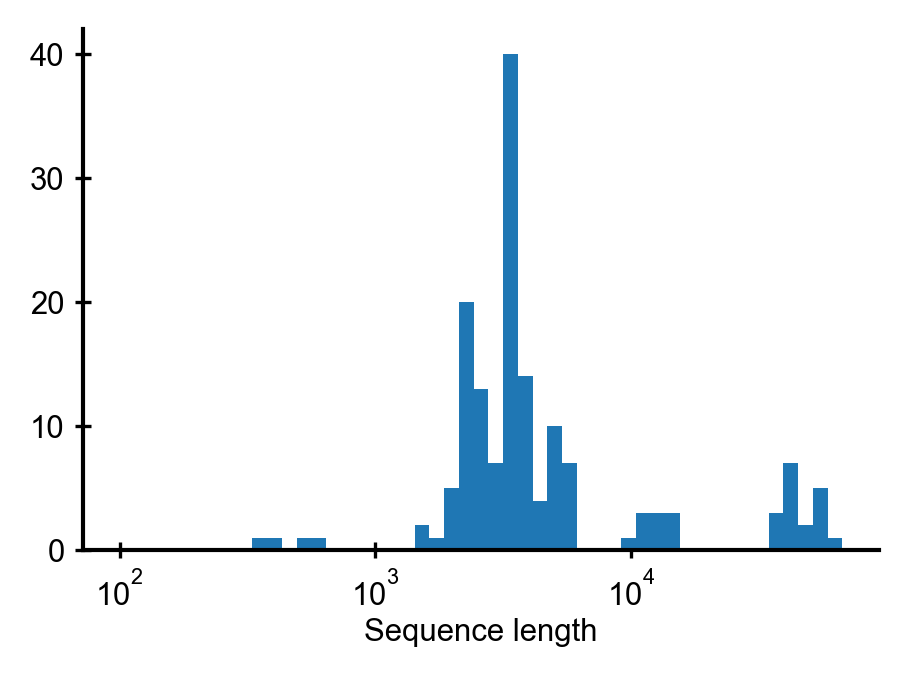

In [24]:
plt.hist(seqlengths, bins=np.logspace(2, np.log10(max(seqlengths))))
plt.xscale('log')
plt.xlabel('Sequence length')

In [25]:
coronaviruses = humanviruses_meta[(humanviruses_meta['vFamily']=='Coronaviridae')&(~humanviruses_meta['genbank'].isna())]

In [26]:
coronaviruses_id = list(coronaviruses['genbank'])
coronaviruses_id.append('MN908947')
#coronaviruses_id.append('AY446894')
coronaviruses_names = list(coronaviruses['vVirusNameCorrected'])
coronaviruses_names.append('SARS-CoV-2')
coronaviruses_names = ['229E', 'OC43', 'SARS-CoV', 'SARS-CoV-2']#, 'CMV']

In [34]:
coronaviruses_id

['AF304460', 'AY585228', 'AY274119', 'MN908947']

In [27]:
matrices = {}
for genbankid in coronaviruses_id:
    matrices[genbankid] = kmers_to_matrix(to_kmers(list(dfs[genbankid]['Sequence']), k=9))

In [28]:
nsample = 2e7
pairwise_hists = {}
for i in range(len(coronaviruses_id)):
    matrix1 = matrices[coronaviruses_id[i]]
    for j in range(i+1, len(coronaviruses_id)):
        matrix2 = matrices[coronaviruses_id[j]]
        if i == j:
            key = coronaviruses_names[i]
        else:
            key = coronaviruses_names[i] + ' ' + coronaviruses_names[j]
        pairwise_hists[key] = pairwise_distances_jit(matrix1,
                                                     data2=matrix2,
                                                     N=nsample)

In [29]:
datasets = ['train', 'test']
sample_matrices = {}
for dataset in datasets:
    sample_matrices[dataset] =  load_matrix('../maxent/data/%s_matrix_L9.csv.gz' % dataset)[::9, :]
pairwise_hists['train_test'] = pairwise_distances_jit(sample_matrices['train'],
                                                  data2=sample_matrices['test'],
                                                  N=nsample)

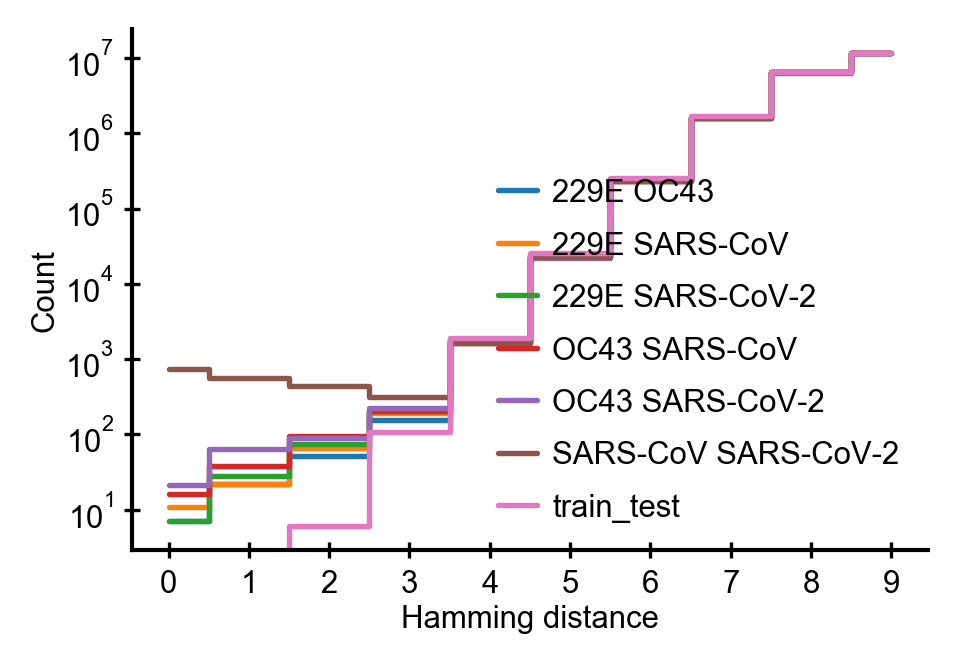

In [30]:
L = 9
bins = np.arange(L+1)
fig, ax = plt.subplots()
for label, hist in pairwise_hists.items():
    ax.step(bins, hist, where='mid', label=label)
ax.set_yscale('log')
ax.set_xticks(bins);
ax.legend(loc='lower right')
ax.set_xlabel('Hamming distance')
ax.set_ylabel('Count');

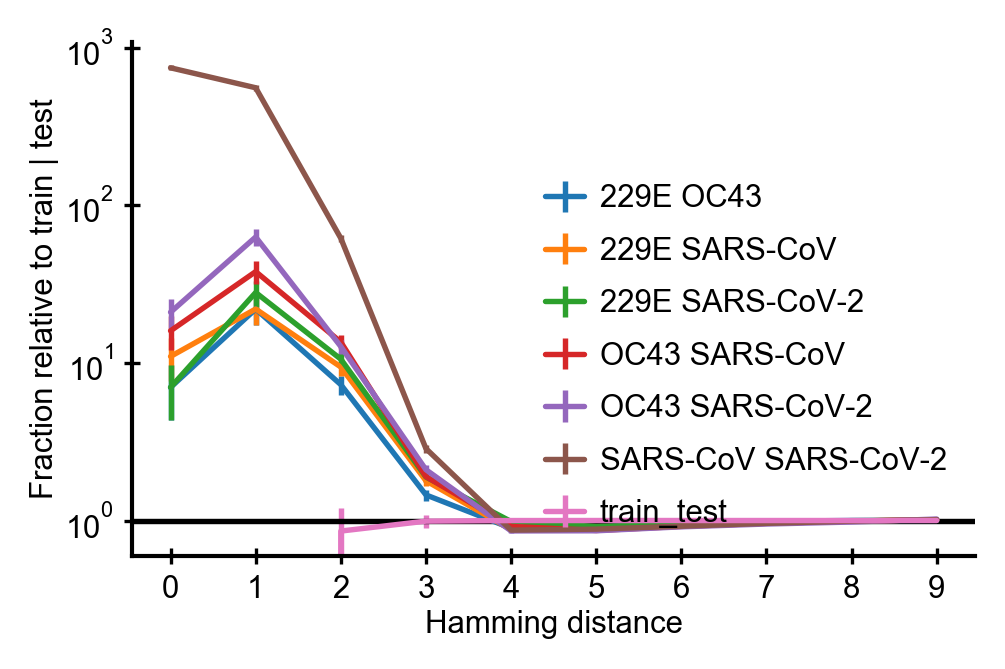

In [31]:
fig, ax = plt.subplots()
for label, hist in pairwise_hists.items():
    ax.errorbar(bins, hist/(pairwise_hists['train_test']+1),
                hist**.5/(pairwise_hists['train_test']+1),
                label=label)
ax.set_xticks(bins)
ax.legend(loc='lower right')
ax.axhline(1.0, c='k')
ax.set_xlabel('Hamming distance')
ax.set_ylabel('Fraction relative to train | test')
ax.set_yscale('log')
fig.tight_layout()

In [32]:
fis = {}
for genbankid, name in zip(coronaviruses_id, coronaviruses_names):
    matrix = matrices[genbankid]
    fis[name] = frequencies(matrix, num_symbols=20)
fis['human'] = frequencies(sample_matrices['train'], num_symbols=20)

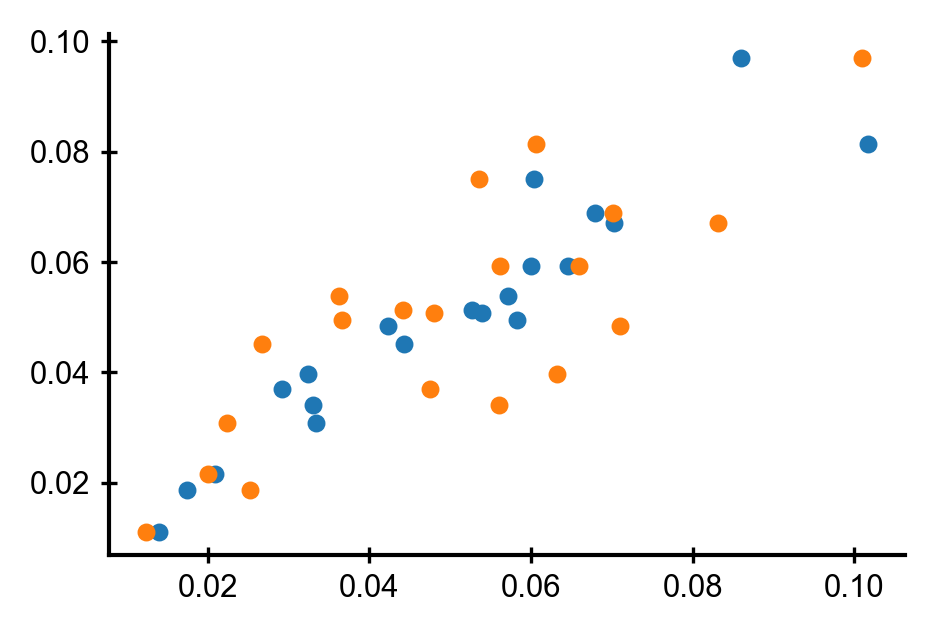

In [33]:
plt.plot(fis['229E'].mean(axis=0), fis['SARS-CoV-2'].mean(axis=0), 'o');
plt.plot(fis['human'].mean(axis=0), fis['SARS-CoV-2'].mean(axis=0), 'o');